In [26]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# load final clean dataset
df = pd.read_csv('merged_clean_data.csv')

In [28]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77938 entries, 0 to 77937
Data columns (total 34 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   provincename                                                                       77938 non-null  object        
 1   Longitude                                                                          77938 non-null  float64       
 2   Latitude                                                                           77938 non-null  float64       
 3   Region.Name                                                                        77938 non-null  object        
 4   Date/Time                                                                          77938 non-null  datetime64[ns]
 5   Utilities                                            

In [30]:
df.head()

,provincename,Longitude,Latitude,Region.Name,Date/Time,Utilities,Construction,Manufacturing,Transportation and warehousing,Educational services,...,Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,Quebec,-78.28,48.8,Berry (MÉ),1998-01-01,0.0,0.484470,3.115150,0.541892,0.744184,...,-22.1,-15.2,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
1,Quebec,-78.28,48.8,Berry (MÉ),1998-02-01,0.0,0.518876,3.524578,0.567285,0.993697,...,-16.0,-8.5,8.0,-37.0,0.0,24.0,24.0,52.0,0.0,0.0
2,Quebec,-78.28,48.8,Berry (MÉ),1998-03-01,0.0,0.535712,3.586342,0.582616,1.143897,...,-13.5,-6.3,16.0,-35.0,62.4,31.0,93.4,22.0,0.0,0.0
3,Quebec,-78.28,48.8,Berry (MÉ),1998-04-01,0.0,0.528170,3.479875,0.580457,1.078400,...,-3.6,3.7,23.0,-12.0,23.0,2.0,25.0,0.0,0.0,0.0
4,Quebec,-78.28,48.8,Berry (MÉ),1998-05-01,0.0,0.578918,3.567952,0.549737,1.031084,...,2.5,11.7,32.0,-5.0,33.3,0.0,33.3,0.0,0.0,0.0


<Axes: >

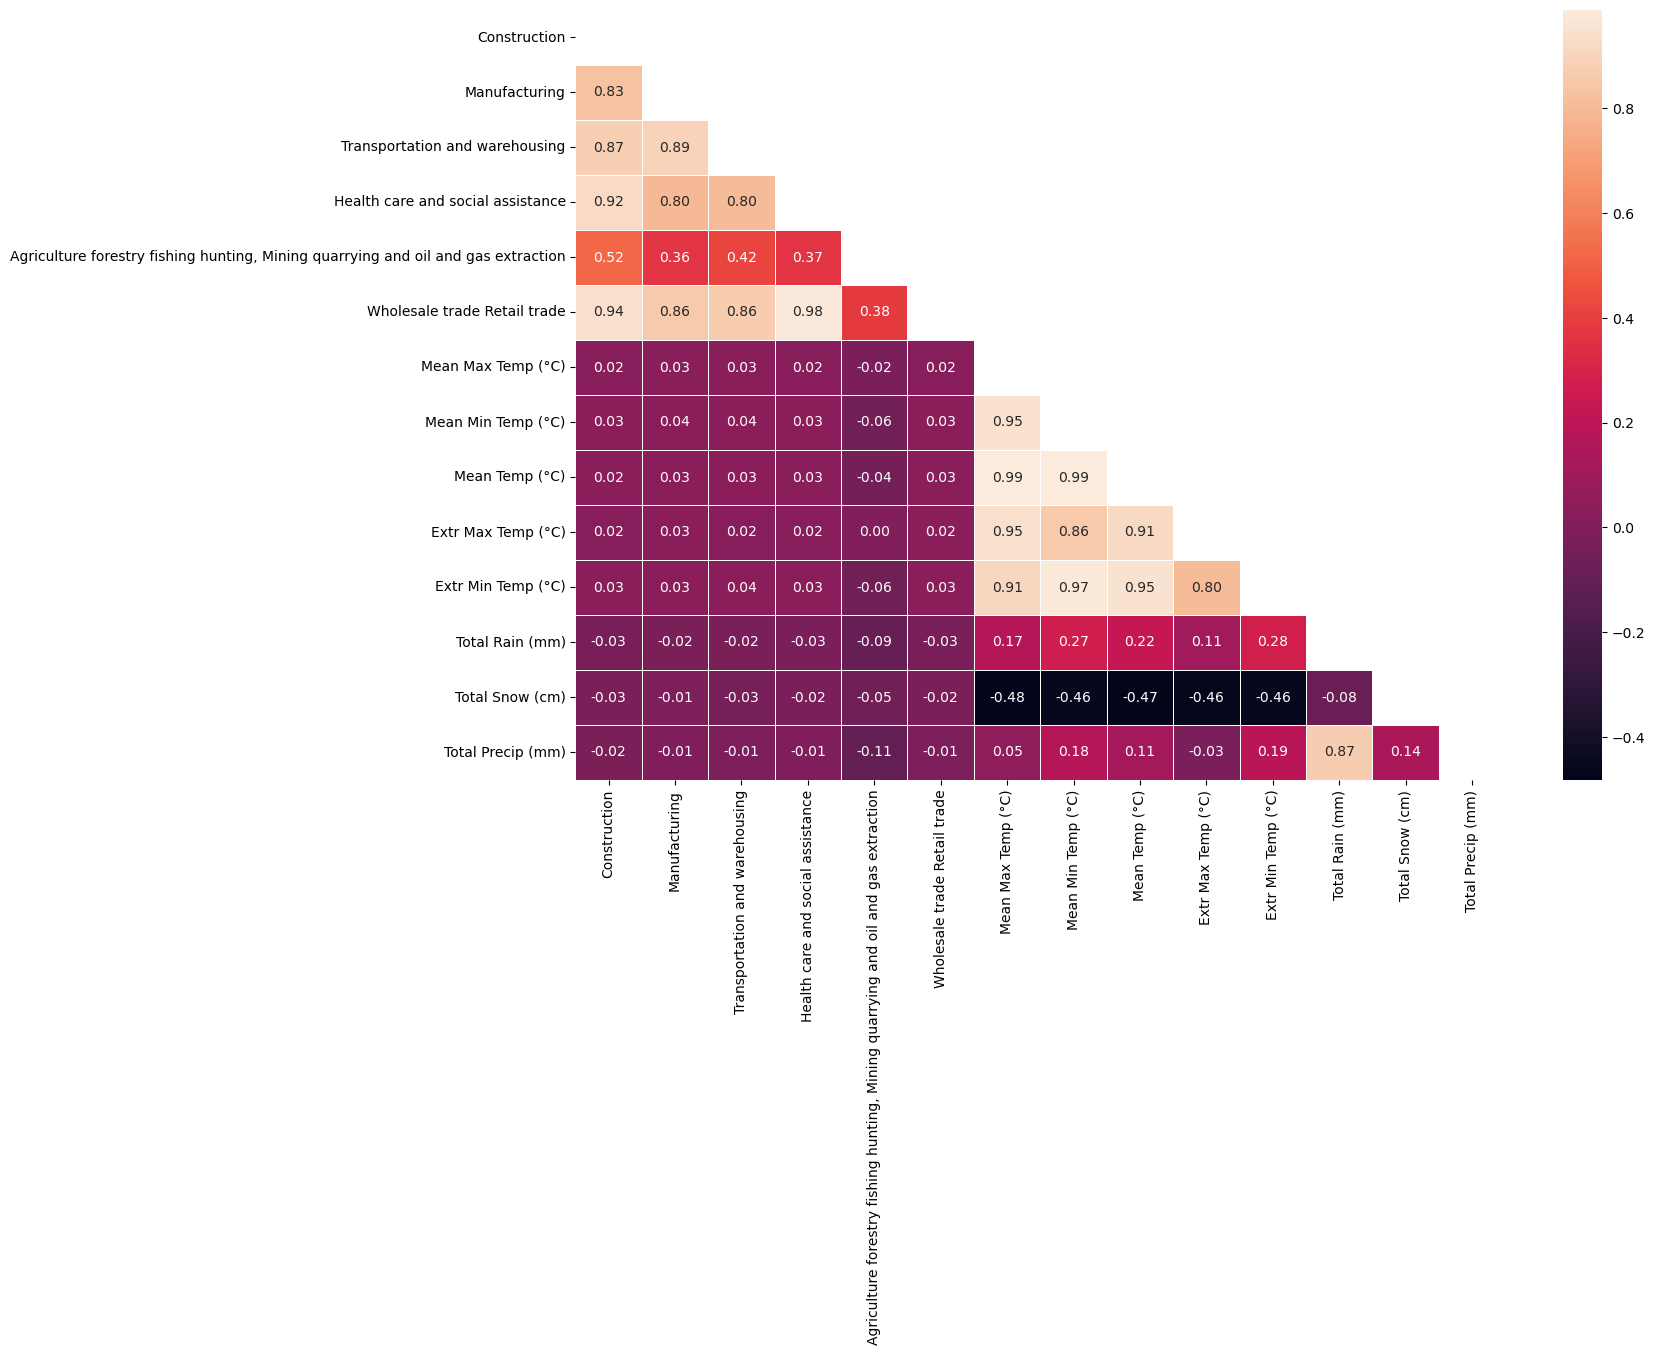

In [33]:
# CORRELATION MATRIX

# numeric columns
num_df = df.select_dtypes(include = ['number'])

# columns to exclude
to_drop = ['Longitude', 'Latitude', 'GeoUID', 'Population']
sectors_todrop = ['Utilities', 'Educational services', 'Accommodation and food services', 'Other services except public administration',
                  'Public administration', 'Finance and insurance, real estate and rental and leasing', 'Professional scientific and technical services',
                  'Information culture and recreation']
weather_data_todrop = ['Snow Grnd Last Day (cm)', 'Dir of Max Gust (10s deg)',
                       'Spd of Max Gust (km/h)']

num_df.drop(columns = to_drop, inplace = True)
num_df.drop(columns = sectors_todrop, inplace = True)
num_df.drop(columns = weather_data_todrop, inplace = True)

# correlation matrix
corr_matrix = num_df.corr()

# to remove the upper portion of the matrix; contains the same information
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# correlation matrix heatmap
plt.figure(figsize= (15, 10))
sns.heatmap(corr_matrix, mask = mask, annot = True, fmt = '.2f', linewidths= 0.5)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load your weather data into a DataFrame (assuming it's already loaded)
# Replace "df" with your DataFrame containing the weather data

df = df[df['Construction'].notnull()]

# Select features (predictors)
X = df[['Mean Max Temp (°C)', 'Mean Min Temp (°C)', 'Mean Temp (°C)', 'Extr Max Temp (°C)',
        'Extr Min Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)']]

# Target variable
y = df['Construction']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)

# Print the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error (MSE): 111118.35512654753
Root Mean Squared Error (RMSE): 333.34419917938806
R-squared (R2): 0.0034200099338613787
             Variable  Coefficient
0  Mean Max Temp (°C)    -8.722884
1  Mean Min Temp (°C)    11.744638
2      Mean Temp (°C)    -0.784762
3  Extr Max Temp (°C)     2.868897
4  Extr Min Temp (°C)    -2.660753
5     Total Rain (mm)    -0.438387
6     Total Snow (cm)    -0.569105
7   Total Precip (mm)     0.217672


c:\Users\chust\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


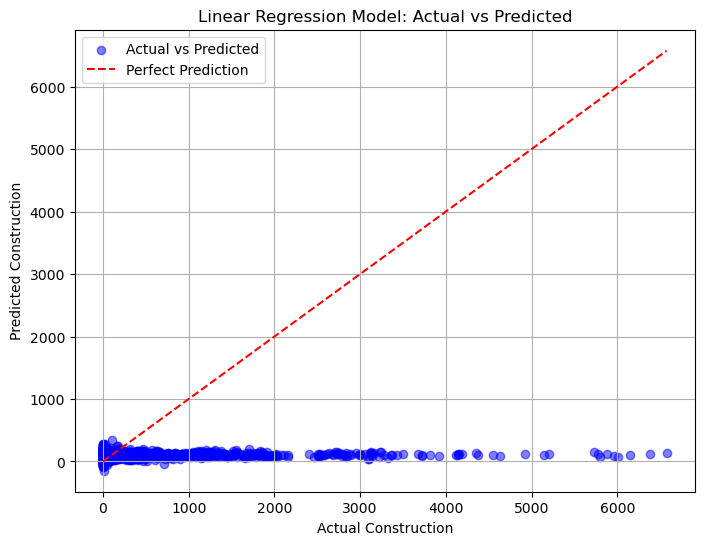

In [37]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')  # Plot actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')  # Plot diagonal line
plt.title('Linear Regression Model: Actual vs Predicted')
plt.xlabel('Actual Construction')
plt.ylabel('Predicted Construction')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


## All 5 provinces ##

In [17]:
# split data into numeric and string
num_cols = df.select_dtypes(include = ['number'])
cat_cols = df.select_dtypes(include = ['object'])

# resample numeric data
resampled_num = num_cols.resample("M").mean()

# resample string data
resampled_cat = cat_cols.resample('M').apply(lambda x: x.value_counts().idxmax())

# combine resampled data
resampled_data_M = pd.concat([resampled_num, resampled_cat], axis = 1)
print(type(resampled_data_M))

# resampled_data = df.resample('M').mean()
# print(resampled_data)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# plot mean max temp
plt.plot(resampled_data_M['Mean Max Temp (°C)'])
plt.title('Mean Max Temperature (°C) 1998 to 2024')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# seasonal decompose to separate different components (trend, seasonality, and residual)

decomp = seasonal_decompose(resampled_data_M['Mean Max Temp (°C)'],
                            period = 12)

decomp.plot()

Dicky-Fuller test

In [ ]:
adfuller_result = adfuller(resampled_data_M['Mean Max Temp (°C)'])
test_statistic, p_value, num_lags, num_obs, critical_values, aic = adfuller_result
print(adfuller_result)

# Print ADF test result along with elements
print(f"ADF Test Result:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Number of Lags: {num_lags}")
print(f"Number of Observations: {num_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")
print(f"Estimated maximized information criterion (aic): {aic}")

if p_value > 0.05:
    print('Data is non-stationary. Needs to be converted to stationary data.')
else:
    print('Data is stationary. Can proceed with model creation.')

ACF and PACF

In [ ]:
# create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))

# plot acf
plot_acf(resampled_data_M['Mean Max Temp (°C)'], zero = False, ax = ax1)

# plot pacf
plot_pacf(resampled_data_M['Mean Max Temp (°C)'],   zero = False, ax = ax2)

plt.tight_layout()
plt.show()

ARIMA model

In [ ]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-4 (Use the partial autocorrelation)
for p in range(5):
# Loop over q values from 0-4 (Use the autocorrelation)
    for q in range(5):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(resampled_data_M['Mean Max Temp (°C)'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

In [ ]:
#to check the minimum value in the dataframe
order_df.AIC.min()

In [ ]:
#to check the minimum value in the dataframe
order_df.BIC.min()

In [ ]:
# Instantiate the model
#model = sm.tsa.ARIMA(milk_prod_diff, order=(9, 0, 4)) #order=(p,d,q)

model = sm.tsa.ARIMA(resampled_data_M['Mean Max Temp (°C)'], order=(2, 0, 3)) #order=(p,d,q)

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

Split data to train and test dataset

In [ ]:
# split data to train and test

train = resampled_data_M.loc[resampled_data_M.index <= '2022-01-01']
test = resampled_data_M.loc[resampled_data_M.index > '2022-01-01']

In [ ]:
#to fit the model after splitting the data

# Instantiate the model
model = sm.tsa.ARIMA(train['Mean Max Temp (°C)'], order=(2, 0, 3)) #order=(p,d,q)

# Fit the model
results_1 = model.fit()


In [ ]:
#get the predictions
predictions = results_1.get_forecast(steps=36)
# Extract prediction mean
mean_predictions =predictions.predicted_mean

In [ ]:
mean_predictions

In [ ]:
test['Mean Max Temp (°C)']#.loc['2022-01-31':'2024-12-31']

In [ ]:
# to calculate MAPE and RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

arima_MAE = mean_absolute_error(test['Mean Max Temp (°C)'].loc['2022-01-31':'2024-01-31'], mean_predictions.loc['2022-01-31':'2024-01-31'])
print('Arima_MAE:', arima_MAE)

arima_MAPE = mean_absolute_percentage_error(test['Mean Max Temp (°C)'].loc['2022-01-31':'2024-01-31'], mean_predictions.loc['2022-01-31':'2024-01-31'])
print('Arima_MAPE:', arima_MAPE)

arima_RMSE = np.sqrt(mean_squared_error(test['Mean Max Temp (°C)'].loc['2022-01-31':'2024-01-31'], mean_predictions.loc['2022-01-31':'2024-01-31']))
print('Arima_RMSE:', arima_RMSE)


In [ ]:
# plot actual data and predictions

plt.plot(resampled_data_M.index, resampled_data_M['Mean Max Temp (°C)'], label='Actual')

plt.plot(mean_predictions.index, mean_predictions.values, label='Predicted')

plt.title('ARIMA Model\nActual vs. Predicted Average Temperature of 5 Provinces')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## Ontario ##
**Forecasting: Agriculture**

In [ ]:
# to filter ON province:

ontario = df[df['provincename'] == 'Ontario']

In [ ]:
ontario = ontario[ontario.index.year < 2022]

In [ ]:
# split data into number and object
num_cols = ontario.select_dtypes(include = ['number'])
cat_cols = ontario.select_dtypes(include = ['object'])

# to resample num data into monthly frequency
resampled_num = num_cols.resample(rule = 'M').mean()

# to resample cat data into monthly frequency
resampled_cat = cat_cols.resample(rule = 'M').apply(lambda x: x.value_counts().idxmax())

# combine resampled num and cat data
resampled_ON = pd.concat([resampled_num, resampled_cat], axis = 1)

In [ ]:
ontario.info()

In [ ]:
print(ontario.index.min())
print(ontario.index.max())

In [ ]:
# plot the utililities
plt.figure(figsize = (15, 5))
plt.plot(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'])
plt.title('Ontario: Agriculture Productivity from 1998 to 2021')
plt.xlabel('Year')
plt.ylabel('Productivity Value')
plt.show()

In [ ]:
# to check different components (trend, seasonality, and residual)

decomp_ON = seasonal_decompose(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'],
                               period = 12)

decomp_ON.plot()

Dicky-Fuller Test

In [ ]:
adfuller_result = adfuller(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'])
adfuller_result = adfuller(resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'])
test_statistic, p_value, num_lags, num_obs, critical_values, aic = adfuller_result
print(adfuller_result)

# Print ADF test result along with elements
print(f"ADF Test Result:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Number of Lags: {num_lags}")
print(f"Number of Observations: {num_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")
print(f"Estimated maximized information criterion (aic): {aic}")

if p_value > 0.05:
    print('Data is non-stationary. Needs to be converted to stationary data.')
else:
    print('Data is stationary. Can proceed with model creation.')

In [ ]:
# transforming data to stationary data

# differencing

resampled_ON_diff = resampled_ON['Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction'].diff(periods = 2).dropna()
resampled_ON_diff

In [ ]:
adfuller_result = adfuller(resampled_ON_diff)
test_statistic, p_value, num_lags, num_obs, critical_values, aic = adfuller_result
print(adfuller_result)

# Print ADF test result along with elements
print(f"ADF Test Result:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Number of Lags: {num_lags}")
print(f"Number of Observations: {num_obs}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")
print(f"Estimated maximized information criterion (aic): {aic}")

if p_value > 0.05:
    print('Data is non-stationary. Needs to be converted to stationary data.')
else:
    print('Data is stationary. Can proceed with model creation.')

In [ ]:
# plotting the transformed data

# plot the utililities
plt.figure(figsize = (15, 5))
plt.plot(resampled_ON_diff)
plt.title('Agriculture Productivity from 1998 to 2021')
plt.xlabel('Year')
plt.ylabel('Productivity Value')
plt.show()

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF on ax1
plot_acf(resampled_ON_diff, lags=14, zero=False, ax=ax1)
# plot_acf(resampled_ON_diff, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(resampled_ON_diff, lags=14, zero=False, ax=ax2)
# plot_pacf(resampled_ON_diff, zero=False, ax=ax2)

plt.show()

SARIMAX MODEL

In [ ]:
# from pmdarima.arima import auto_arima

# model = auto_arima(resampled_ON_diff, start_p=1, start_q=1,
#                       test='adf',
#                       max_p=14, max_q=14,
#                       m=1,             
#                       d=0,          
#                       seasonal=False,   
#                       start_P=0, 
#                       D=None, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

In [ ]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values (Use the partial autocorrelation)
for p in range(14):
# Loop over q values (Use the autocorrelation)
    for q in range(14):
        try:
            # Create and fit SARIMAX(p,d,q) model
            model = sm.tsa.SARIMAX(resampled_ON_diff, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\state

4 1 None None


c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\chust\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sari

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

In [ ]:
#to check the minimum value in the dataframe
print("AIC_min:", order_df.AIC.min())

#to check the minimum value in the dataframe
print('BIC_min:', order_df.BIC.min())

In [ ]:
# Instantiate the model

model = sm.tsa.SARIMAX(resampled_ON_diff, order=(2, 0, 4)) #order=(p,d,q)

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-48)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals.head().T
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction']
upper_limits = confidence_intervals.loc[:,'upper Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction']

# Print best estimate predictions
print(mean_forecast)

In [ ]:
# plot the  data
plt.figure(figsize = (15, 5))
plt.plot(resampled_ON_diff.index, resampled_ON_diff, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.title('SARIMAX Model\nOntario: Agriculture Productivity Actual vs Prediction')
plt.xlabel('Year')
plt.ylabel('Agricuture Productivity Values')
plt.legend()
plt.show()

In [ ]:
# to calculate MAE, MAPE and RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

sarimax_MAE = mean_absolute_error(resampled_ON_diff.loc['2018-01-31': '2021-12-31'], mean_forecast)
print('Sarimax_MAE:', sarimax_MAE)

sarimax_MAPE = mean_absolute_percentage_error(resampled_ON_diff.loc['2018-01-31': '2021-12-31'], mean_forecast)
print('Sarimax_MAPE:', sarimax_MAPE)

sarimax_RMSE = np.sqrt(mean_squared_error(resampled_ON_diff.loc['2018-01-31': '2021-12-31'], mean_forecast))
print('Sarimax_RMSE:', sarimax_RMSE)


IGNORE BELOW

Split data to train and test dataset

In [ ]:
# split data to train and test

train = resampled_ON_diff.loc[resampled_ON_diff.index <= '2020-01-01']
test = resampled_ON_diff.loc[resampled_ON_diff.index > '2020-01-01']

In [ ]:
#to fit the model after splitting the data

# Instantiate the model
model = sm.tsa.ARIMA(train, order=(1, 1, 2)) #order=(p,d,q)

# Fit the model
results = model.fit()


In [ ]:
#get the predictions
predictions = results.get_forecast(steps=24)
# Extract prediction mean
mean_predictions =predictions.predicted_mean
print(mean_predictions)

In [ ]:
test.loc['2020-01-31': '2021-12-31']

In [ ]:
# to calculate MAPE and RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

arima_MAE = mean_absolute_error(test, mean_predictions)
print('Arima_MAE:', arima_MAE)

arima_MAPE = mean_absolute_percentage_error(test, mean_predictions)
print('Arima_MAPE:', arima_MAPE)

arima_RMSE = np.sqrt(mean_squared_error(test, mean_predictions))
print('Arima_RMSE:', arima_RMSE)


In [ ]:
# plot actual data and predictions

plt.plot(resampled_ON_diff.index, resampled_ON_diff, label='Actual')

plt.plot(mean_predictions.index, mean_predictions.values, label='Predicted')

plt.title('Actual vs. Predicted Mean Max Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)

plt.show()